In [9]:
# Exploratory Data Analysis
import os
import sys
import matplotlib.pyplot as plt
import json

# Addeding folder path to sys.path
sys.path.append('/Users/jeetundaviya/Documents/rag_chatbot')

from src.preprocessing.document_loader import load_document
from src.preprocessing.text_splitter import split_document


In [12]:
# Load the document
file_path = "/Users/jeetundaviya/Desktop/Clean Code_ A Handbook of Agile Software Craftsmanship - Robert C. Martin.pdf"
documents = load_document(file_path)

In [13]:
# Inspect the document
print(f"Number of pages in the document: {len(documents)}")
print("Sample content from the first page:")
print(documents[0].page_content)

Number of pages in the document: 462
Sample content from the first page:



In [14]:
# Split the document into chunks
chunks = split_document(documents, chunk_size=512, chunk_overlap=50)

In [15]:
# Analyze chunk distribution
chunk_lengths = [len(chunk.page_content) for chunk in chunks]

In [16]:
print(f"Total Chunks: {len(chunks)}")
print(f"Average Chunk Size: {sum(chunk_lengths) / len(chunk_lengths):.2f}")

Total Chunks: 461
Average Chunk Size: 1941.51


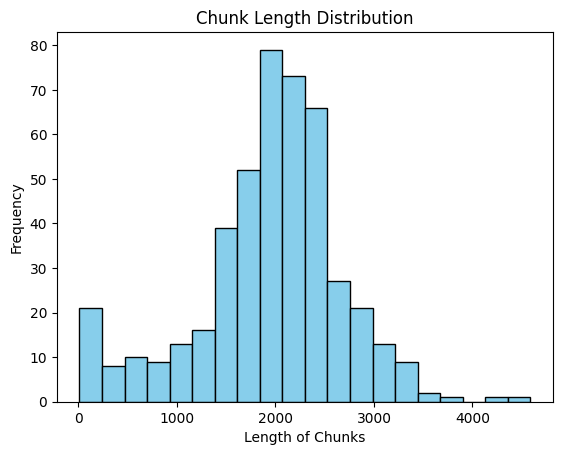

In [17]:
# Plot chunk length distribution
plt.hist(chunk_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title("Chunk Length Distribution")
plt.xlabel("Length of Chunks")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Save chunked data for further use
os.makedirs("data/processed", exist_ok=True)
with open("data/processed/chunks.json", "w") as f:
    json.dump([chunk.page_content for chunk in chunks], f)

print("Chunks saved to 'data/processed/chunks.json'")

Chunks saved to 'data/processed/chunks.json'
